* ##############################################
* ######### 전국 민간 아파트 분양가격 분석하기 ######### 
* ##############################################

# import

In [4]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('pandas', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
plt.rc("font", family="Malgun Gothic") # window
#plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

python 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
numpy 1.26.4
pandas 2.2.2
matplotlib 3.9.2
pandas 0.13.2


# df_2023 전처리코드 정리 (최종)

In [5]:
####### df_2023 전처리하기
df_2023 = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','
df_2023.head()
df_2023.info()

### ==> 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_2023_nn=df_2023.loc[df_2023['분양가격(제곱미터)'].notnull()]

# ### ==> 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형 | 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_2023_ft=df_2023_nn.copy()
df_2023_ft['분양가격(제곱미터)']=pd.to_numeric(df_2023_ft['분양가격(제곱미터)'], errors='coerce')
df_2023_ft=df_2023_ft.loc[df_2023_ft['분양가격(제곱미터)'].notnull()]

### ==> 3) '분양가격(제곱미터)'을  '평당분양가격'으로 변환하기 (단 column이름은 '분양가격') (참고: 3w자료에서는 평당분양가격임)
df_2023_ft["분양가격"]=df_2023_ft['분양가격(제곱미터)'] * 3.3
df_prep=df_2023_ft.drop(columns=['분양가격(제곱미터)'])

### ==> 4) '규모구분'을 '전용면적'으로 변환하기
def parse_area_only(x):
    x2=x.replace("모든면적", "전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3
    
df_prep["전용면적"] = df_prep["규모구분"].map(parse_area_only)
df_prep=df_prep.drop(columns=['규모구분'], errors='ignore') # '규모구분' column이 없는 경우 error raise 방지

## ==> 5) reset_index 후 전처리한 데이터 확인하기
df_prep=df_prep.reset_index(drop=True)

df_prep.head()
df_prep.info()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     7322 non-null   object 
 1   연도      7322 non-null   int64  
 2   월       7322 non-null   int64  
 3   분양가격    7322 non-null   float64
 4   전용면적    7322 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 286.1+ KB


# Seaborn 으로 시각화 하기

# boxplot
* estimator 없음

## 모든 분양가격 

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: ylabel='분양가격'>

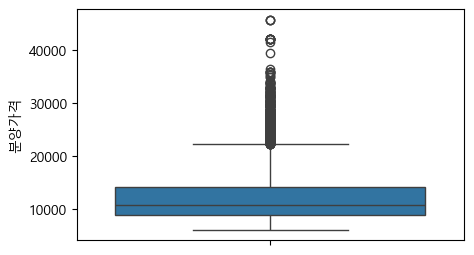

In [6]:
fig=plt.figure(figsize=(5, 3))
ax1=fig.subplots()
df_prep.head()

sns.boxplot(data=df_prep, y="분양가격", ax=ax1)

## <실습1>
* 지역별 분양가격 boxplot
* ax1: seaborn
* ax2: pandas plot
* ax3: pandas plot (ax1의 x tick label과 같은 순서로)
* ax4: seaborn  (ax2의 x tick label과 같은 순서로)

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='지역명', ylabel='분양가격'>

분양가격    Axes(0.125,0.511739;0.775x0.167391)
dtype: object

<Axes: >

<Axes: xlabel='지역명', ylabel='분양가격'>

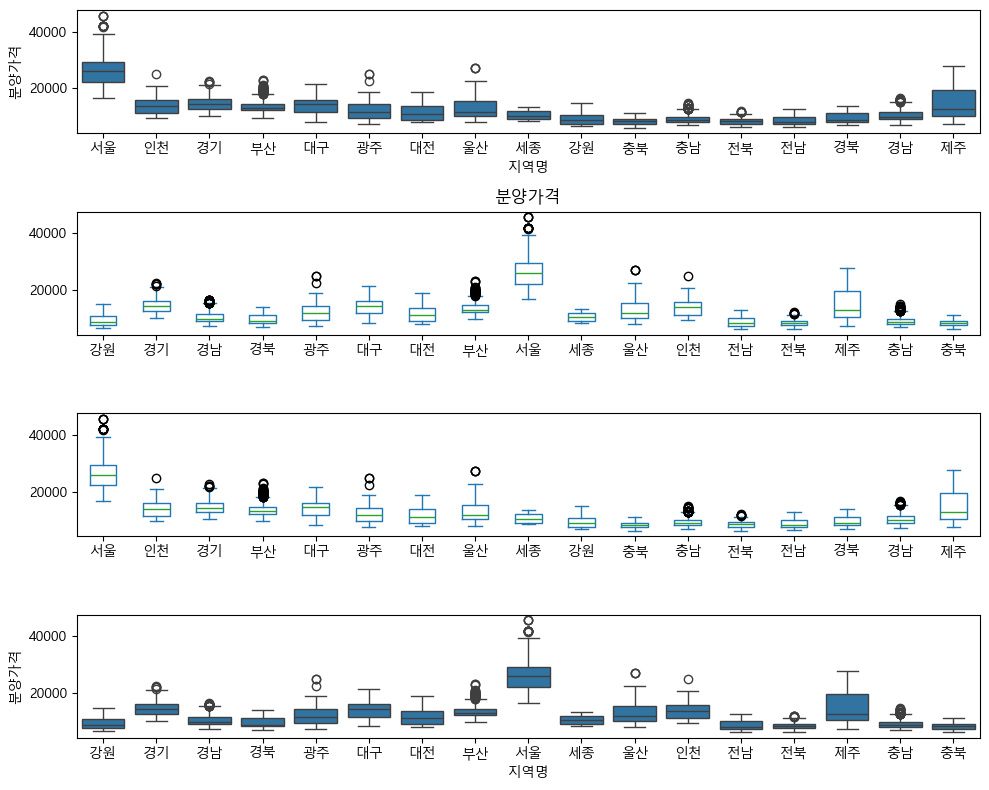

In [24]:
fig=plt.figure(figsize=(10, 8))
ax1, ax2, ax3, ax4=fig.subplots(4,1)
df_prep.head()

## ax1
sns.boxplot(data=df_prep, x='지역명', y='분양가격', ax=ax1)

## ax2
df_prep.plot.box(ax=ax2, column='분양가격', by='지역명')

## ax3
df_conc = pd.DataFrame()

for n1 in map(lambda x:x.get_text(), ax1.get_xticklabels()):
    sr1 = df_prep.loc[df_prep['지역명'] == n1, '분양가격'].reset_index(drop=True)
    sr1.name = n1
    df_conc = pd.concat([df_conc, sr1], axis=1)

df_conc.plot.box(ax=ax3, rot=0)

## ax4
city_list = list(map(lambda x:x.get_text(), ax2.get_xticklabels()))
sns.boxplot(data=df_prep, x='지역명', y='분양가격', ax=ax4, order=city_list)

fig.tight_layout()

## 연도별 전용면적별 분양가격

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='연도', ylabel='분양가격'>

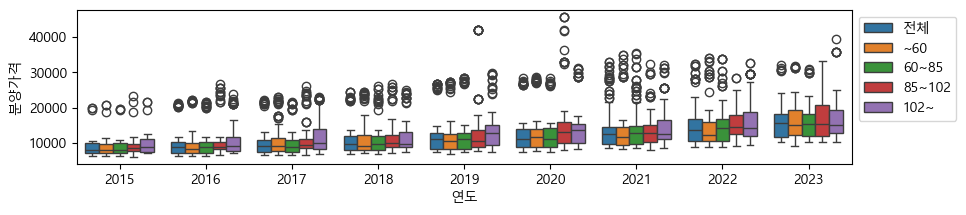

In [25]:
fig=plt.figure(figsize=(10, 2))
ax1=fig.subplots()
df_prep.head()

sns.boxplot(data=df_prep, x='연도',hue='전용면적',y="분양가격", ax=ax1)
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='연도', ylabel='분양가격'>

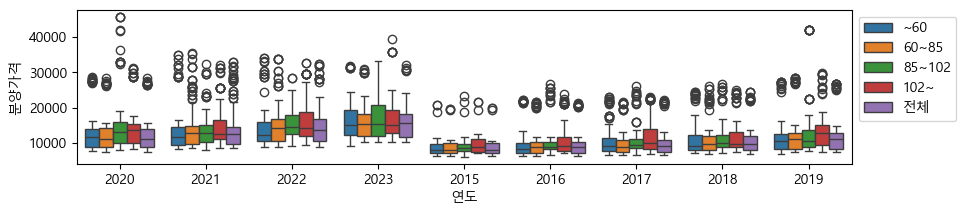

In [26]:
fig=plt.figure(figsize=(10, 2))
ax1=fig.subplots()
df_prep.head()

sns.boxplot(data=df_prep, x='연도',hue='전용면적',y="분양가격",
            order=[2020,2021,2022,2023,2015,2016,2017,2018,2019],
            hue_order=['~60','60~85','85~102','102~','전체'],
            ax=ax1)
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='연도', ylabel='분양가격'>

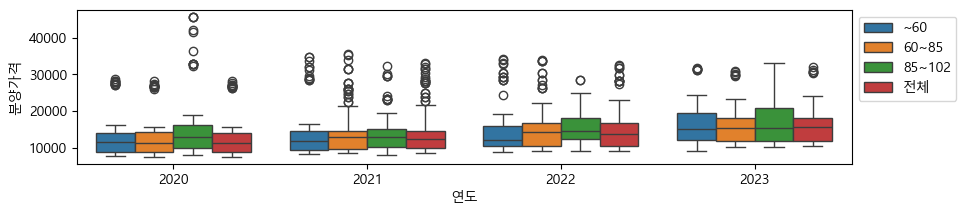

In [29]:
fig=plt.figure(figsize=(10, 2))
ax1=fig.subplots()
df_prep.head()

sns.boxplot(data=df_prep, x='연도',hue='전용면적',y="분양가격",
            order=[2020,2021,2022,2023],
            hue_order=['~60','60~85','85~102','전체'], # numeric 일 경우 동작하지 않음
            ax=ax1)

# sns.boxplot(data=df_prep, x='전용면적',hue='연도',y="분양가격",
#             hue_order=[2020,2021,2022,2023],# numeric 일 경우 동작하지 않음
#             ax=ax1)


ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

# violinplot : hist + box
* estimator 없음

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: ylabel='분양가격'>

Text(0.5, 1.0, '모든 분양가격')

<Axes: xlabel='연도', ylabel='분양가격'>

Text(0.5, 1.0, '연도별 분양가격')

<Axes: xlabel='연도', ylabel='분양가격'>

Text(0.5, 1.0, '연도별 전용면적별 분양가격')

Text(0.5, 0.98, '<< violinplot >>   ')

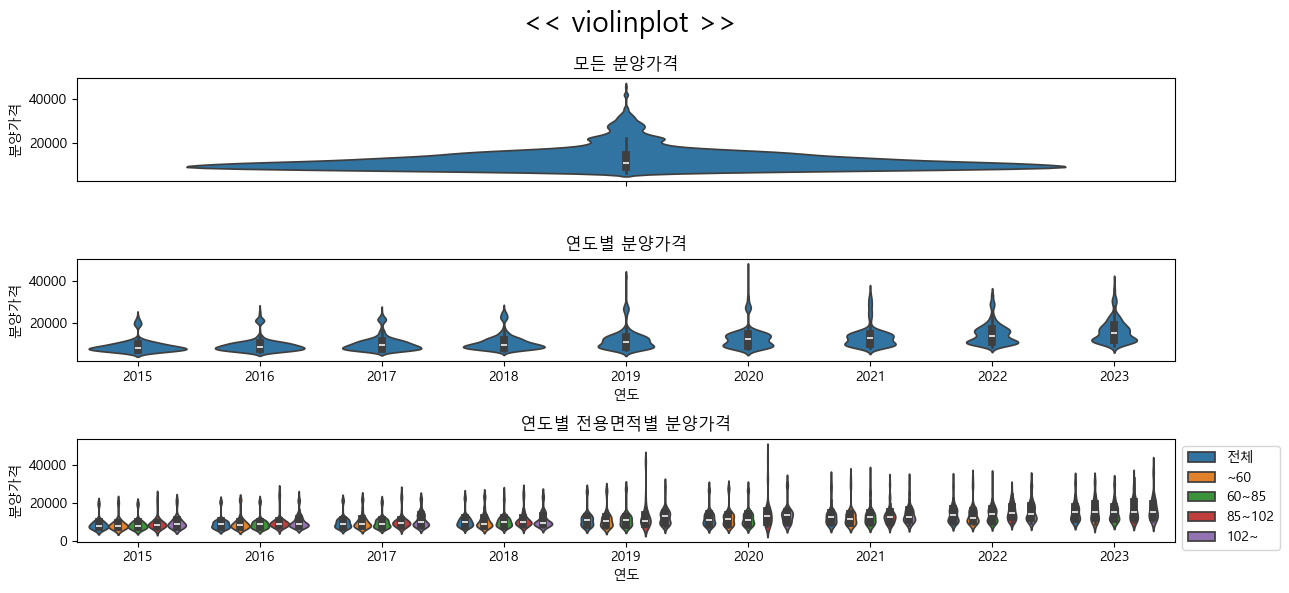

In [30]:
fig=plt.figure(figsize=(13, 6))
ax1, ax2, ax3=fig.subplots(3,1)
df_prep.head()

sns.violinplot(data=df_prep, y="분양가격", ax=ax1)
ax1.set_title('모든 분양가격')

sns.violinplot(data=df_prep, x="연도", y="분양가격", ax=ax2)
ax2.set_title('연도별 분양가격')

sns.violinplot(data=df_prep, x="연도", y="분양가격", hue="전용면적", ax=ax3)
ax3.set_title('연도별 전용면적별 분양가격')

ax3.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.suptitle('<< violinplot >>   ', fontsize=20)
fig.tight_layout()

# 2013~2015년 데이터처리하기 (df_2015)

## 파일 로드 & 결측치 확인

In [33]:
# dataframe max columns 설정
pd.options.display.max_columns = 30

# 파일 로드
df_2015 = pd.read_csv("data/전국평균 분양가격 (2013년12월~2015년8월).csv", encoding="cp949")
df_2015.shape
df_2015.head()
df_2015.info()

# 결측치 확인
df_2015.isnull().sum().sum()

(17, 22)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

0

# melt로 Tidy data 만들기

## melt toy example

In [34]:
df1 = pd.DataFrame({"first": ["John", "Mary",'Chris'],
                    "id": [10,20,30],
                    "height": [5.5, 6.0,4.1],
                    "weight": [130, 150,140]})
df1
print('############# id_vars 1개 #######################')
df1.melt(id_vars='first', value_vars='height')
df1.melt(id_vars='first', value_vars='height', var_name='a1', value_name='v1')
df1.melt(id_vars='first', value_vars=['height','weight'], var_name='a1', value_name='v1')
print('############# id_vars 2개 #######################')
df1.melt(id_vars=['first','id'], value_vars='height', var_name='a1', value_name='v1')
df1.melt(id_vars=['first','id'], var_name='a1', value_name='v1') # default value_vars: id_vars 제외한 모든 columns
print('############# id_vars 1개, value vars 나머지 #######################')
df1.melt(id_vars='first', var_name='a1', value_name='v1') # default value_vars: id_vars 제외한 모든 columns

,first,id,height,weight
0,John,10,5.5,130
1,Mary,20,6.0,150
2,Chris,30,4.1,140


############# id_vars 1개 #######################


,first,variable,value
0,John,height,5.5
1,Mary,height,6.0
2,Chris,height,4.1


,first,a1,v1
0,John,height,5.5
1,Mary,height,6.0
2,Chris,height,4.1


,first,a1,v1
0,John,height,5.5
1,Mary,height,6.0
2,Chris,height,4.1
3,John,weight,130.0
4,Mary,weight,150.0
5,Chris,weight,140.0


############# id_vars 2개 #######################


,first,id,a1,v1
0,John,10,height,5.5
1,Mary,20,height,6.0
2,Chris,30,height,4.1


,first,id,a1,v1
0,John,10,height,5.5
1,Mary,20,height,6.0
2,Chris,30,height,4.1
3,John,10,weight,130.0
4,Mary,20,weight,150.0
5,Chris,30,weight,140.0


############# id_vars 1개, value vars 나머지 #######################


,first,a1,v1
0,John,id,10.0
1,Mary,id,20.0
2,Chris,id,30.0
3,John,height,5.5
4,Mary,height,6.0
5,Chris,height,4.1
6,John,weight,130.0
7,Mary,weight,150.0
8,Chris,weight,140.0


## melt를 df_2015에 적용하기

In [38]:
df_2015 = pd.read_csv("data/전국평균 분양가격 (2013년12월~2015년8월).csv", encoding="cp949")
df_2015.head()

df_2015_melt = df_2015.melt(id_vars="지역", var_name="기간", value_name="분양가격")

# df_2023과 같은 column이름 사용하기
df_2015_melt.rename(columns={'지역':"지역명"}, inplace=True)
df_2015_melt.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


,지역명,기간,분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


## <실습2>
* 주어진 df1에 melt를 사용하여 df2처럼 만드시오

In [42]:
df1 = df_prep.copy()
df1=df1.iloc[::700].reset_index(drop=True)
df1['그룹1']=list('ABCDEFGHIJK')
df1['G2']=range(1,12)
df1

print('#### df2')
## 코드작성
df2 = df1.melt(id_vars=['지역명','월'], value_vars=['그룹1', 'G2'], var_name="변수", value_name="값")
df2

,지역명,연도,월,분양가격,전용면적,그룹1,G2
0,서울,2015,10,19275.3,전체,A,1
1,충남,2016,6,7220.4,60~85,B,2
2,인천,2017,3,10490.7,전체,C,3
3,충북,2017,11,7494.3,85~102,D,4
4,경북,2018,8,9273.0,102~,E,5
5,서울,2019,6,26730.0,전체,F,6
6,부산,2020,3,13035.0,전체,G,7
7,전남,2020,12,9969.3,85~102,H,8
8,충남,2021,9,9520.5,60~85,I,9
9,대전,2022,6,13790.7,60~85,J,10


#### df2


,지역명,월,변수,값
0,서울,10,그룹1,A
1,충남,6,그룹1,B
2,인천,3,그룹1,C
3,충북,11,그룹1,D
4,경북,8,그룹1,E
5,서울,6,그룹1,F
6,부산,3,그룹1,G
7,전남,12,그룹1,H
8,충남,9,그룹1,I
9,대전,6,그룹1,J


# df_2015_melt 연도와 월을 분리하기

## pandas.str.split 사용

In [43]:
df_2015_melt['연도pd']=df_2015_melt['기간'].str.split('년').str.get(0).astype(int)
df_2015_melt['월pd']=df_2015_melt['기간'].str.split('년').str.get(1).str[:-1].astype(int)
df_2015_melt

,지역명,기간,분양가격,연도pd,월pd
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


## map사용

In [44]:
def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

def parse_month(date):
    month = date.split("년")[-1].replace("월", "")
    month = int(month)
    return month

# map 활용해 연도만 추출해서 새로운 컬럼에 담습니다.
df_2015_melt["연도map"] = df_2015_melt["기간"].map(parse_year)
# map 활용해 월만 추출해서 새로운 컬럼에 담습니다.
df_2015_melt["월map"] = df_2015_melt["기간"].map(parse_month)
df_2015_melt

,지역명,기간,분양가격,연도pd,월pd,연도map,월map
0,서울,2013년12월,18189,2013,12,2013,12
1,부산,2013년12월,8111,2013,12,2013,12
2,대구,2013년12월,8080,2013,12,2013,12
3,인천,2013년12월,10204,2013,12,2013,12
4,광주,2013년12월,6098,2013,12,2013,12
...,...,...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8,2015,8
353,전남,2015년8월,6289,2015,8,2015,8
354,경북,2015년8월,7037,2015,8,2015,8
355,경남,2015년8월,7665,2015,8,2015,8


## <실습3>
* 주어진 df1의 '기간' column의 연 월 값을 곱한 값을 갖는 'value' column을 만드시오

In [46]:
df_2015 = pd.read_csv("data/전국평균 분양가격 (2013년12월~2015년8월).csv", encoding="cp949")
df_2015_melt = df_2015.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df1=df_2015_melt.iloc[::30].copy()
df1

## 코드작성
def get_mul_of_date(date):
    date = date.split('년')
    year = int(date[0])
    month = int(date[1][:-1])
    return year*month

df1['value']=df1['기간'].map(get_mul_of_date)
df1

,지역,기간,평당분양가격
0,서울,2013년12월,18189
30,전남,2014년1월,5678
60,강원,2014년3월,6141
90,대전,2014년5월,8341
120,부산,2014년7월,9457
150,경북,2014년8월,6563
180,충북,2014년10월,6529
210,울산,2014년12월,8891
240,대구,2015년2월,8416
270,경남,2015년3월,7668


,지역,기간,평당분양가격,value
0,서울,2013년12월,18189,24156
30,전남,2014년1월,5678,2014
60,강원,2014년3월,6141,6042
90,대전,2014년5월,8341,10070
120,부산,2014년7월,9457,14098
150,경북,2014년8월,6563,16112
180,충북,2014년10월,6529,20140
210,울산,2014년12월,8891,24168
240,대구,2015년2월,8416,4030
270,경남,2015년3월,7668,6045


# df_2015 전처리코드 (최종)

In [47]:
df_2015 = pd.read_csv("data/전국평균 분양가격 (2013년12월~2015년8월).csv", encoding="cp949")
df_2015_melt = df_2015.melt(id_vars="지역", var_name="기간", value_name="분양가격")
df_2015_melt.rename(columns={'지역':"지역명"}, inplace=True)

df_2015_melt['연도']=df_2015_melt['기간'].str.split('년').str.get(0).astype(int)
df_2015_melt['월']=df_2015_melt['기간'].str.split('년').str.get(1).str[:-1].astype(int)

df_2015_prep=df_2015_melt.drop(columns='기간')
df_2015_prep

,지역명,분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


# df_all (df_2015_prep과 df_2023_prep 합치기)

In [52]:
df_2015_prep.head() # 에러시 <9. df_2015 전처리코드 (최종)> 수행
df_2023_prep=df_prep.copy() # 에러시 <2. df_2023 전처리코드 정리> (최종) 수행
df_2023_prep

## df_2023_prep 전용면적 '전체'만 고르기
if '전용면적' in df_2023_prep.columns:
    df_2023_prep=df_2023_prep.loc[df_2023_prep['전용면적']=='전체'] # df_2015가 전용면적 별 데이터가 없음으로 전체만 선택
    df_2023_prep=df_2023_prep.drop(columns='전용면적')
df_2023_prep.head() 

## concat
df_all=pd.concat((df_2015_prep, df_2023_prep), axis=0)

## reset_index
df_all=df_all.reset_index(drop=True)
df_all

df_all.info()

,지역명,분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~
...,...,...,...,...,...
7317,제주,2023,6,24175.8,전체
7318,제주,2023,6,24357.3,~60
7319,제주,2023,6,23377.2,60~85
7320,제주,2023,6,21908.7,85~102


,지역명,연도,월,분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


,지역명,분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
1918,전북,11124.3,2023,6
1919,전남,11226.6,2023,6
1920,경북,12639.0,2023,6
1921,경남,11655.6,2023,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     1923 non-null   object 
 1   분양가격    1923 non-null   float64
 2   연도      1923 non-null   int64  
 3   월       1923 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 60.2+ KB


## <실습4>
* df_all에서 2018년도 분양가격 data중 빠진 데이터가 하나 있다. 어느 도시의 어느 월의 데이터가 빠졌는가?

In [53]:
df_all
## 코드작성
df_2018=df_all.loc[df_all['연도']==2018]
df_2018['지역명'].value_counts()
df_2018['월'].value_counts()
df_2018[['월','지역명']].value_counts()
df_2018[['월','지역명']].value_counts().unstack(1)

,지역명,분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
1918,전북,11124.3,2023,6
1919,전남,11226.6,2023,6
1920,경북,12639.0,2023,6
1921,경남,11655.6,2023,6


지역명
서울    12
강원    12
경남    12
경북    12
전남    12
전북    12
충남    12
충북    12
세종    12
인천    12
대전    12
광주    12
대구    12
부산    12
경기    12
제주    12
울산    11
Name: count, dtype: int64

월
1     17
2     17
3     17
4     17
5     17
6     17
7     17
8     17
9     17
10    17
11    17
12    16
Name: count, dtype: int64

월   지역명
1   강원     1
9   경북     1
8   울산     1
    인천     1
    전남     1
          ..
5   경남     1
    경북     1
    광주     1
    대구     1
12  충북     1
Name: count, Length: 203, dtype: int64

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
월,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## <실습5>
* df_all에는 각 연월 별로 데이터가 17개씩 있어야 한다 (지역이 모두 17개이므로)
* 데이터가 부족한 연월이 어떤 연월인지 알기 위해 아래와 같은 count table을 만드시오

In [54]:
df_all[['월','연도']].value_counts().unstack(1)

연도,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
월,,,,,,,,,,,
1,NaN,17.0,17.0,17.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0
2,NaN,17.0,17.0,17.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0
3,NaN,17.0,17.0,17.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0
4,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,17.0
5,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,17.0
6,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,17.0
7,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,NaN
8,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,NaN
9,NaN,17.0,NaN,17.0,17.0,17.0,17.0,16.0,17.0,17.0,NaN


# <실습6>
* 사용데이터:df_all
* ax1) 연도별 boxplot
* ax2) 지역별 boxplot (중앙값으로 sorting)
* ax3) '서울','대전','대구','부산' 지역의 2014, 2018, 2022 연도 평균 bar그래프


,지역명,분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12


<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='지역명', ylabel='분양가격'>

<Axes: xlabel='지역명', ylabel='분양가격'>

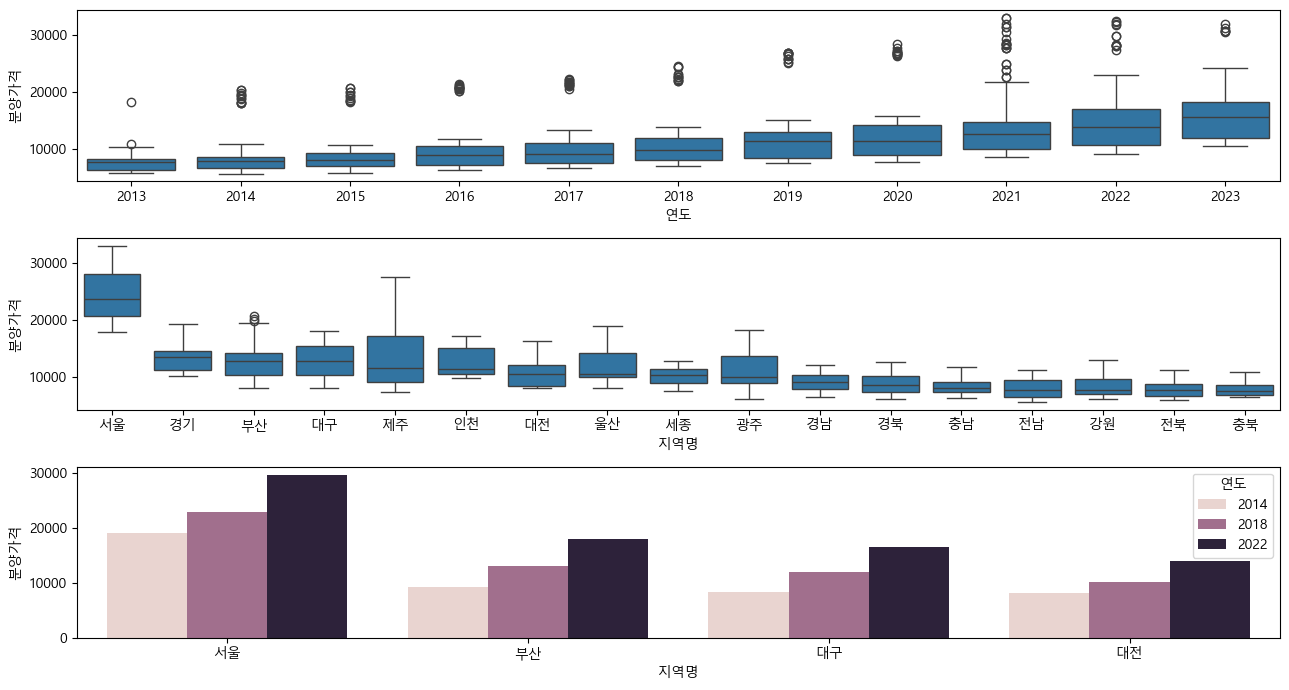

In [18]:
fig=plt.figure(figsize=(13, 7))
ax1, ax2, ax3=fig.subplots(3,1)
df_all.head()

## ax1

## ax2

## ax3

fig.tight_layout()

# <실습7>
* 부동산투자를 하려고 한다. 가장 수익이 날 것같은 지역을 선택해보자
* df_all 데이터 사용
* 각 지역별로 ,
* 가장 가격이 높았던 연월의 분양가격(a)
* 현재 (2023년 6월) 분양가격(b)
* 전체 평균 분양가격 (ave)
* (a-b)/ave가 가장 큰 지역을 구하고, 구한 지역의 연월 데이터를 아래와 같이 bar그래프로 그려보자

<Axes: xlabel='연도', ylabel='분양가격'>

Text(0.5, 1.0, '제주 (score:0.2485399593893483)')

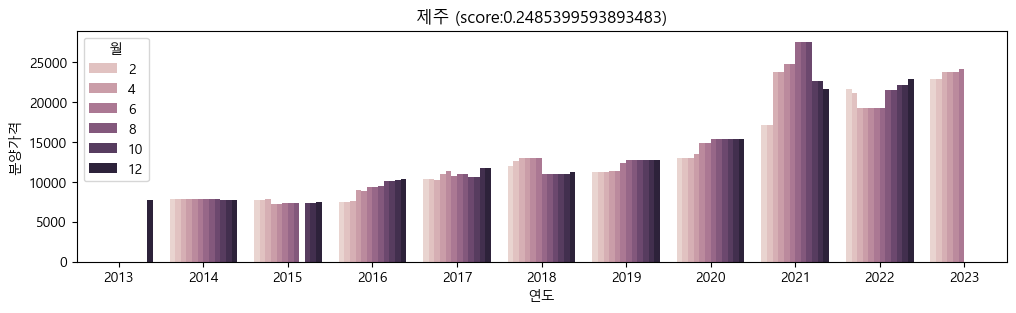

In [19]:
fig=plt.figure(figsize=(12,3), dpi=100) # 액자 설정
ax1=fig.subplots() # 도화지 설정

## 코드작성

ax1.set_title('{} (score:{})'.format(reg1, val1))

# === 실습풀이 ===

## <실습1>
* 지역별 분양가격 boxplot
* ax1: seaborn
* ax2: pandas plot
* ax3: pandas plot (ax1의 x tick label과 같은 순서로)
* ax4: seaborn  (ax2의 x tick label과 같은 순서로)

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='지역명', ylabel='분양가격'>

분양가격    Axes(0.125,0.511739;0.775x0.167391)
dtype: object

<Axes: xlabel='지역명', ylabel='분양가격'>

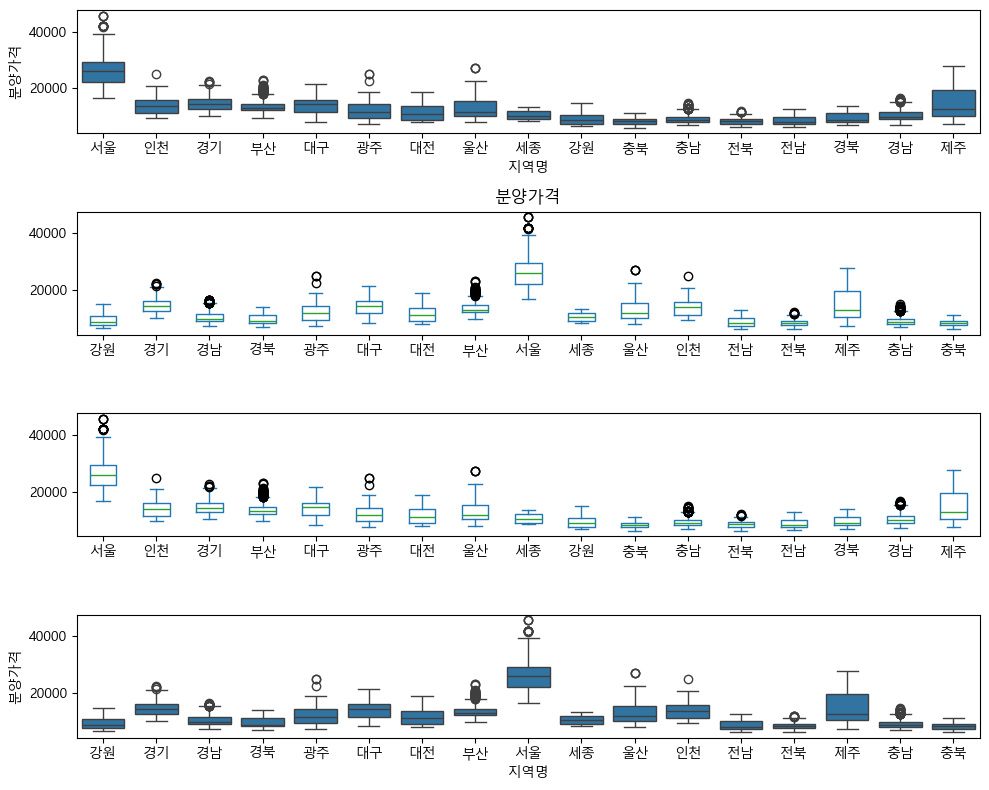

In [4]:
fig=plt.figure(figsize=(10, 8))
ax1, ax2, ax3, ax4=fig.subplots(4,1)
df_prep.head()

## ax1
sns.boxplot(data=df_prep, x='지역명',y="분양가격", ax=ax1)

## ax2
df_prep.plot.box(column='분양가격', by='지역명', ax=ax2)

## ax3
df_conc=pd.DataFrame()

ax1_xticklabels=[i.get_text() for i in ax1.get_xticklabels()]
for n1 in ax1_xticklabels:
    sr1=df_prep.loc[df_prep['지역명']==n1, '분양가격'].reset_index(drop=True)
    sr1.name=n1
    df_conc=pd.concat([df_conc, sr1], axis=1)
_=df_conc.plot.box(ax=ax3)

## ax4
ax2_xticklabels=[i.get_text() for i in ax2.get_xticklabels()]
sns.boxplot(data=df_prep, x='지역명',y="분양가격", order=ax2_xticklabels, ax=ax4) # order 파라미터의 사용

fig.tight_layout()

## <실습2>
* 주어진 df1에 melt를 사용하여 df2처럼 만드시오

In [10]:
df1 = df_prep.copy()
df1=df1.iloc[::700].reset_index(drop=True)
df1['그룹1']=list('ABCDEFGHIJK')
df1['G2']=range(1,12)
df1

print('#### df2')
## 코드작성
df2=df1.melt(id_vars=['지역명','월'], value_vars=['그룹1','G2'], var_name='변수', value_name='값')
df2


,지역명,연도,월,분양가격,전용면적,그룹1,G2
0,서울,2015,10,19275.3,전체,A,1
1,충남,2016,6,7220.4,60~85,B,2
2,인천,2017,3,10490.7,전체,C,3
3,충북,2017,11,7494.3,85~102,D,4
4,경북,2018,8,9273.0,102~,E,5
5,서울,2019,6,26730.0,전체,F,6
6,부산,2020,3,13035.0,전체,G,7
7,전남,2020,12,9969.3,85~102,H,8
8,충남,2021,9,9520.5,60~85,I,9
9,대전,2022,6,13790.7,60~85,J,10


#### df2


,지역명,월,변수,값
0,서울,10,그룹1,A
1,충남,6,그룹1,B
2,인천,3,그룹1,C
3,충북,11,그룹1,D
4,경북,8,그룹1,E
5,서울,6,그룹1,F
6,부산,3,그룹1,G
7,전남,12,그룹1,H
8,충남,9,그룹1,I
9,대전,6,그룹1,J


## <실습3>
* 주어진 df1의 '기간' column의 연 월 값을 곱한 값을 갖는 'value' column을 만드시오

In [13]:
df_2015 = pd.read_csv("data/전국평균 분양가격 (2013년12월~2015년8월).csv", encoding="cp949")
df_2015_melt = df_2015.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df1=df_2015_melt.iloc[::30].copy()
df1

## 코드작성
def f1(date):
    year = int(date.split("년")[0])
    month= int(date.split("년")[1].replace("월", ""))
    return year*month

df1['value']=df1['기간'].map(f1)
## 코드작성 끝
df1

,지역,기간,평당분양가격
0,서울,2013년12월,18189
30,전남,2014년1월,5678
60,강원,2014년3월,6141
90,대전,2014년5월,8341
120,부산,2014년7월,9457
150,경북,2014년8월,6563
180,충북,2014년10월,6529
210,울산,2014년12월,8891
240,대구,2015년2월,8416
270,경남,2015년3월,7668


,지역,기간,평당분양가격,value
0,서울,2013년12월,18189,24156
30,전남,2014년1월,5678,2014
60,강원,2014년3월,6141,6042
90,대전,2014년5월,8341,10070
120,부산,2014년7월,9457,14098
150,경북,2014년8월,6563,16112
180,충북,2014년10월,6529,20140
210,울산,2014년12월,8891,24168
240,대구,2015년2월,8416,4030
270,경남,2015년3월,7668,6045


## <실습4>
* df_all에서 2018년도 분양가격 data중 빠진 데이터가 하나 있다. 어느 도시의 어느 월의 데이터가 빠졌는가?

In [16]:
df_all
## 코드작성
df_2018=df_all.loc[df_all['연도']==2018]
df_2018['지역명'].value_counts()
df_2018['월'].value_counts()
df_2018[['월','지역명']].value_counts()
df_2018[['월','지역명']].value_counts().unstack(1)
## 코드작성 끝

,지역명,분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
1918,전북,11124.3,2023,6
1919,전남,11226.6,2023,6
1920,경북,12639.0,2023,6
1921,경남,11655.6,2023,6


지역명
서울    12
강원    12
경남    12
경북    12
전남    12
전북    12
충남    12
충북    12
세종    12
인천    12
대전    12
광주    12
대구    12
부산    12
경기    12
제주    12
울산    11
Name: count, dtype: int64

월
1     17
2     17
3     17
4     17
5     17
6     17
7     17
8     17
9     17
10    17
11    17
12    16
Name: count, dtype: int64

월   지역명
1   강원     1
9   경북     1
8   울산     1
    인천     1
    전남     1
          ..
5   경남     1
    경북     1
    광주     1
    대구     1
12  충북     1
Name: count, Length: 203, dtype: int64

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
월,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## <실습5>
* df_all에는 각 연월 별로 데이터가 17개씩 있어야 한다 (지역이 모두 17개이므로)
* 데이터가 부족한 연월이 어떤 연월인지 알기 위해 아래와 같은 count table을 만드시오

In [17]:
df_all[['월','연도']].value_counts().unstack(1)

연도,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
월,,,,,,,,,,,
1,NaN,17.0,17.0,17.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0
2,NaN,17.0,17.0,17.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0
3,NaN,17.0,17.0,17.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0
4,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,17.0
5,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,17.0
6,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,17.0
7,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,NaN
8,NaN,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,NaN
9,NaN,17.0,NaN,17.0,17.0,17.0,17.0,16.0,17.0,17.0,NaN


## <실습6>
* 사용데이터:df_all
* ax1) 연도별 boxplot
* ax2) 지역별 boxplot (중앙값으로 sorting)
* ax3) '서울','대전','대구','부산' 지역의 2014, 2018, 2022 연도 평균 bar그래프


,지역명,분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12


<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='지역명', ylabel='분양가격'>

<Axes: xlabel='지역명', ylabel='분양가격'>

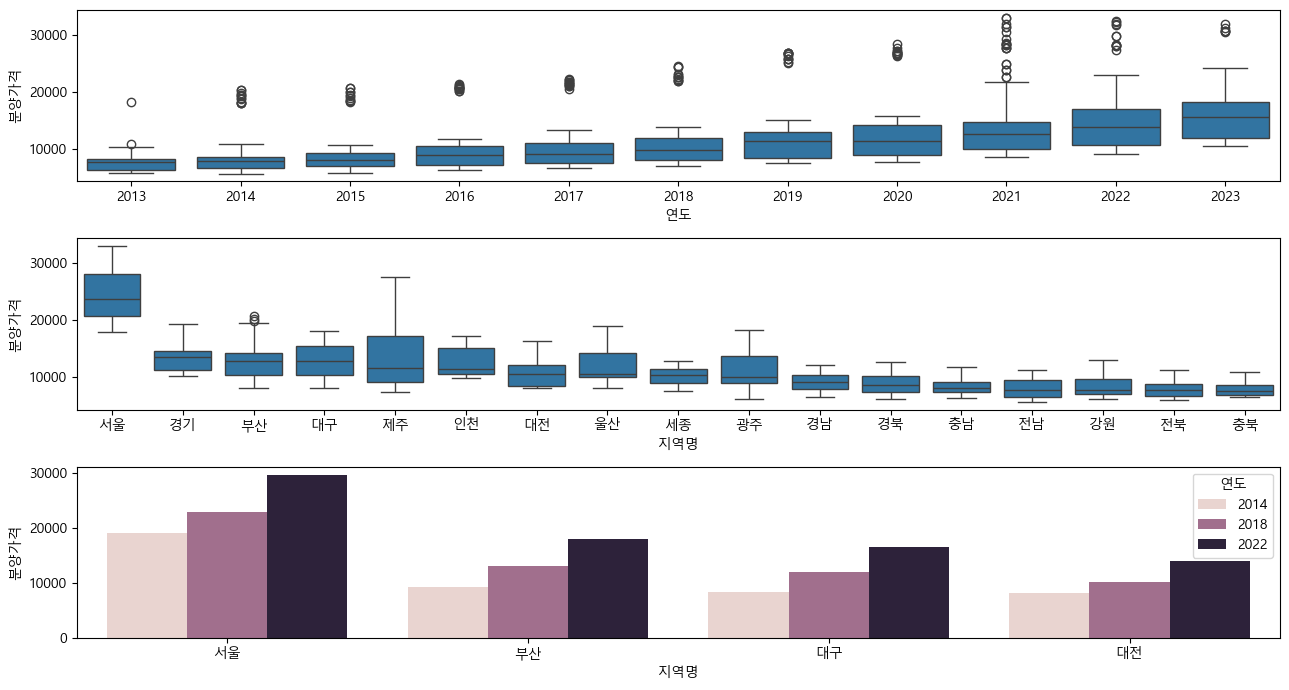

In [44]:
fig=plt.figure(figsize=(13, 7))
ax1, ax2, ax3=fig.subplots(3,1)
df_all.head()

## ax1
sns.boxplot(data=df_all, x='연도',y="분양가격", ax=ax1)

## ax2
df_region_sort=df_all.groupby('지역명')['분양가격'].median().sort_values(ascending=False)
sns.boxplot(data=df_all, x='지역명',y="분양가격", order=df_region_sort.index, ax=ax2)

## ax3
df_sub=df_all.loc[df_all['지역명'].isin(['서울','대전','대구','부산'])]
df_sub=df_sub.loc[df_sub['연도'].isin([2014, 2018, 2022])]
                  
sns.barplot(data=df_sub, x='지역명', hue='연도', y='분양가격', ax=ax3, errorbar=None)

fig.tight_layout()

## <실습6-2> barplot order 및 hue_order parameter 사용 (주의: 현재 버전은 hue data type이 numeric 일 경우 동작하지 않음)
* 사용데이터:df_all
* ax1) 연도별 boxplot
* ax2) 지역별 boxplot (중앙값으로 sorting)
* ax3) '서울','대전','대구','부산' 지역의 2014, 2018, 2022 연도 평균 bar그래프


,지역명,분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12


<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='지역명', ylabel='분양가격'>

<Axes: xlabel='지역명', ylabel='분양가격'>

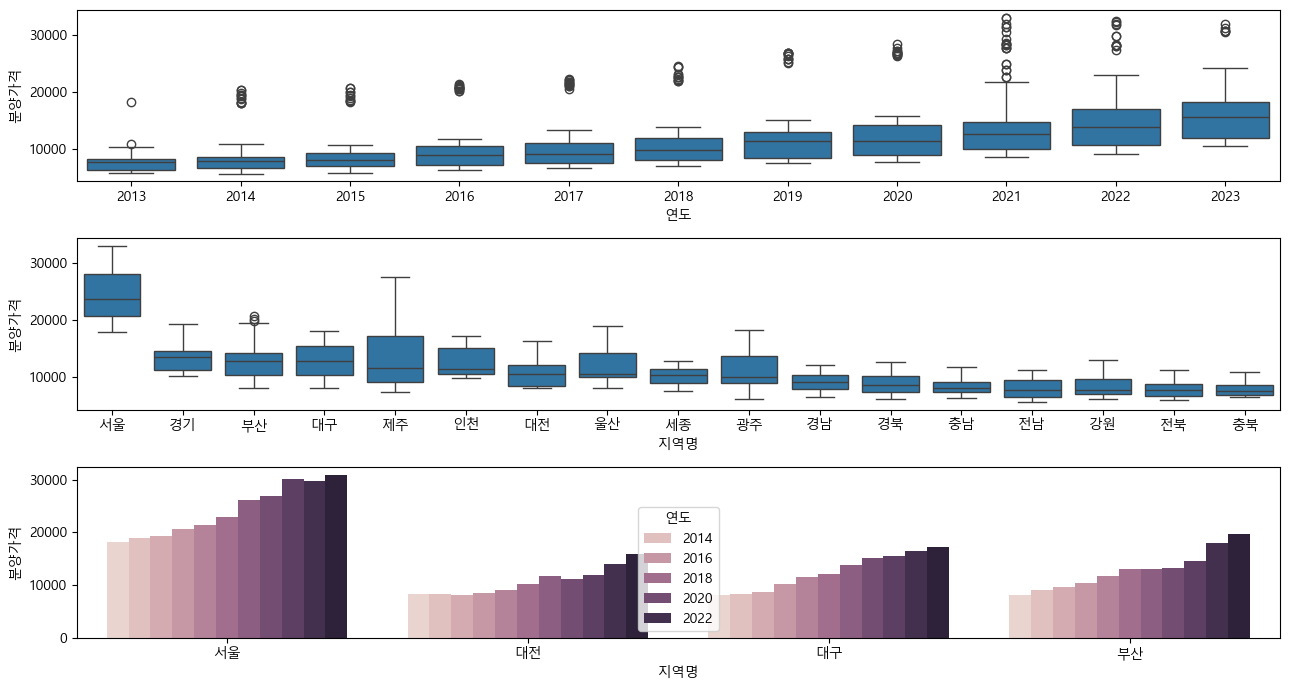

In [40]:
fig=plt.figure(figsize=(13, 7))
ax1, ax2, ax3=fig.subplots(3,1)
df_all.head()

## ax1
sns.boxplot(data=df_all, x='연도',y="분양가격", ax=ax1)

## ax2
df_region_sort=df_all.groupby('지역명')['분양가격'].median().sort_values(ascending=False)
sns.boxplot(data=df_all, x='지역명',y="분양가격", order=df_region_sort.index, ax=ax2)

## ax3                 
sns.barplot(data=df_all, x='지역명', hue='연도', y='분양가격',
            order=['서울','대전','대구','부산'], 
            hue_order=[2014, 2018, 2022], # 현재 버전으로는 numeric 일 경우 동작하지 않음
            ax=ax3, errorbar=None)

fig.tight_layout()

## <실습7>
* 부동산투자를 하려고 한다. 가장 수익이 날 것같은 지역을 선택해보자
* df_all 데이터 사용
* 각 지역별로 ,
* 가장 가격이 높았던 연월의 분양가격(a)
* 현재 (2023년 6월) 분양가격(b)
* 전체 평균 분양가격 (ave)
* (a-b)/ave가 가장 큰 지역을 구하고, 구한 지역의 연월 데이터를 아래와 같이 bar그래프로 그려보자

<Axes: xlabel='연도', ylabel='분양가격'>

Text(0.5, 1.0, '제주 (score:0.2485399593893483)')

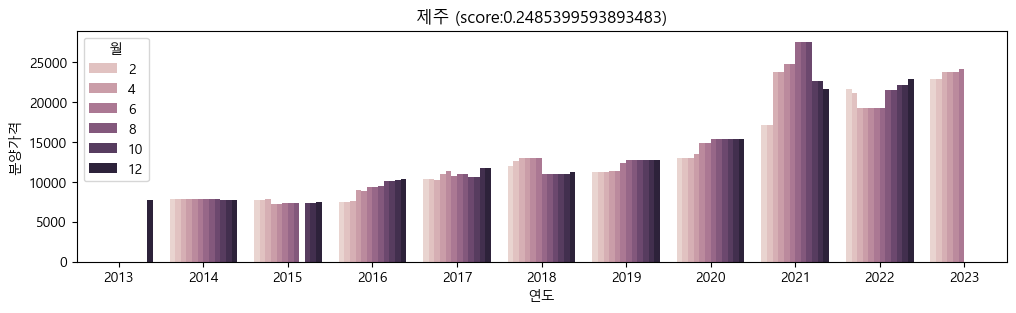

In [19]:
fig=plt.figure(figsize=(12,3), dpi=100) # 액자 설정
ax1=fig.subplots() # 도화지 설정

max1=df_all.groupby('지역명')['분양가격'].max()
now1=df_all.loc[(df_all['연도']==2023)&(df_all['월']==6)].set_index('지역명')['분양가격']
ave1=df_all.groupby('지역명')['분양가격'].mean()

score=(max1-now1)/ave1
score=score.sort_values(ascending=False)

reg1=score.index[0]
val1=score.iloc[0]

df11=df_all.loc[df_all['지역명']==reg1]
sns.barplot(data=df11, y='분양가격', x='연도', hue='월', ax=ax1)
ax1.set_title('{} (score:{})'.format(reg1, val1))